# Importing data

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv(r'../data/raw/raw-data.csv').iloc[10000:, :]
data.drop(columns=['PatientId', 'AppointmentID'], inplace=True)
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
10000,F,2016-04-28T07:35:20Z,2016-05-04T00:00:00Z,76,FORTE SÃO JOÃO,0,0,0,0,0,1,No
10001,F,2016-05-05T07:17:25Z,2016-05-11T00:00:00Z,67,ROMÃO,0,0,0,0,0,1,No
10002,F,2016-05-12T07:31:37Z,2016-05-18T00:00:00Z,39,ROMÃO,0,0,0,0,0,0,No
10003,M,2016-05-19T08:12:01Z,2016-05-25T00:00:00Z,76,FORTE SÃO JOÃO,0,1,0,0,0,1,Yes
10004,F,2016-04-28T07:35:33Z,2016-05-04T00:00:00Z,43,BONFIM,1,0,0,0,0,1,No


### Check if out data is immbalance.

In [2]:
import plotly.express as px

for values in data.columns[5:]:
    figg = px.pie(
        names=pd.Series(np.array(data[values].unique())),
        values=pd.Series(np.array(data[values].value_counts())),
        title=f"{values} Percentage Distribution"
    )

    figg.update_layout(
        width = 400,
        height = 400
    )

    figg.show()

In [3]:
import plotly.express as px

figg = px.pie(
    names=pd.Series(np.array(data['Gender'].unique())),
    values=pd.Series(np.array(data['Gender'].value_counts())),
    title="Gender Percentage Distribution"
)

figg.update_layout(
        width = 400,
        height = 400
)

figg.show()

- So the ratio of no-show in output column is `20:80`.

- So in our *original data*, all the feature columns have `immbalanced` ratio, and this is not a concern for feature columns, so we will focus on balancing our output feature `(No-show)`.

### Balance Target Feature

In [4]:
counts = data['No-show'].value_counts()

min_count = counts.min()
larger_category = counts.idxmax()

larger_indices = data[data['No-show'] == larger_category].index
indices_to_drop = larger_indices[:(counts[larger_category] - min_count - 10000)]

new_data = data.drop(indices_to_drop).reset_index(drop=True)

In [5]:
fig = px.pie(
    names=pd.Series(np.array(new_data['No-show'].unique())),
    values=pd.Series(np.array(new_data['No-show'].value_counts())),
    title="No-show Percentage Distribution"
)

fig.update_layout(
        width = 400,
        height = 400
)

fig.show()

- 40:60 percent ratio is not bad for our training process, and it will not that baised.

In [6]:
import plotly.express as px

for values in data.columns[5:]:
    figg = px.pie(
        names=pd.Series(np.array(new_data[values].unique())),
        values=pd.Series(np.array(new_data[values].value_counts())),
        title=f"{values} Percentage Distribution"
    )

    figg.update_layout(
        width = 400,
        height = 400
    )

    figg.show()

In [7]:
import plotly.express as px

figg = px.pie(
    names=pd.Series(np.array(new_data['Gender'].unique())),
    values=pd.Series(np.array(new_data['Gender'].value_counts())),
    title="Gender Percentage Distribution"
)

figg.update_layout(
    width = 500,
    height = 500
)

figg.show()

In [8]:
data.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap',
       'SMS_received', 'No-show'],
      dtype='object')

# Outliers Detecting In Columns.

In [9]:
data.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,100527.000000,100527.000000,100527.000000,100527.000000,100527.000000,100527.000000,100527.000000
mean,36.995941,0.099625,0.197549,0.072558,0.027326,0.022253,0.321277
std,23.197252,0.299501,0.398152,0.259410,0.163032,0.161785,0.466969
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


- As you can see, `Age` is the only column that is likely to have outliers.

### Let's check outliers in our Age columns.

In [10]:
figure = px.box(
    data, 
    x='Age',
    title = "Age Box Plot: "
)
figure.show()

- As you can see, -1 is invalid age and only one outlier which is 115

In [11]:
data = data[data['Age'] > 0]

In [12]:
## Interquartile Range Method
quartiles = data['Age'].quantile([0.25, 0.5, 0.75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
iqr = q3 - q1

upper_bond = q3 + 1.5 * iqr

data.drop(data[(data['Age'] > upper_bond)].index, inplace=True)

## Z-score Method
mean = data['Age'].mean()
std_dev = data['Age'].std()

data = data[(data['Age'] > mean - 3 * std_dev) & (data['Age'] < mean + 3 * std_dev)]

In [13]:
figure = px.box(
    data, 
    x='Age',
    title = "Age Box Plot: "
)
figure.show()

<Axes: xlabel='Handcap', ylabel='count'>

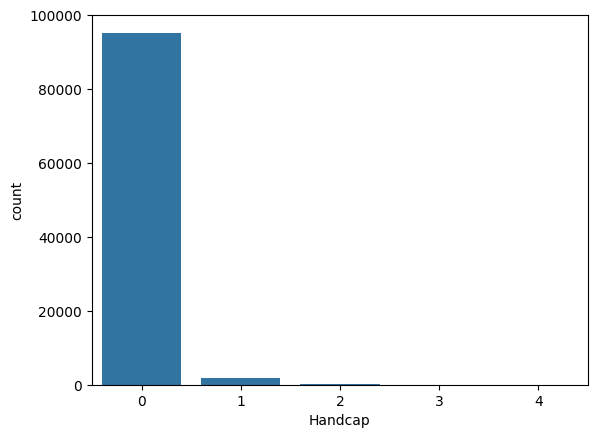

In [14]:
import seaborn as sns

sns.countplot(data, x='Handcap')

- So as you can see this poorly immbalanced.

In [15]:
data['Handcap'] = data['Handcap'].map(lambda x: 1 if x ==0 else 0)

#### Change data type of two columns `ScheduledDay` &  `AppointmentDay`.

In [16]:
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay'])
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay'])

# Export our cleaned data

In [17]:
data.to_csv('../data/processed/cleaned-data.csv', index=False, encoding='utf-8')